# Aula 5 (21/10/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

---

## 1 - Tutorial de Detecção de bordas 

Por que fazer detecção de bordas:
- Obter características mais salientes da imagem, que se destacam mais 
- Ter menor custo computacional para processamento da imagem, porém mantendo as características importantes da mesma

A forma mais simples de identificar bordas é por meio da variação brusca da intensidade do pixel. Pode-se escolher qual a interpretação dessa variação brusca, como os modelos de bordas abaixo:

![Tipos de bordas](https://www.researchgate.net/publication/336125919/figure/fig1/AS:808365928235008@1569740864405/Different-types-of-edges-4.ppm)


Pode-se identificar essas bordas pelo gradiente:

![Gradiente da imagem](https://images.slideplayer.com/25/8048957/slides/slide_3.jpg)

### Detecção de borda de Prewitt e Sobel

![Tpos de operadores](https://media.geeksforgeeks.org/wp-content/uploads/20200513065235/edge6.png)

Um dos mais utilizados são os operadores de Prewitt e Sobel:

![prewitt e sobel](https://www.researchgate.net/profile/Kiao-Inthavong/publication/303653621/figure/fig5/AS:368693969211393@1464914900042/Sobel-Prewitt-and-Roberts-edge-detector-mask-and-the-first-order-derivative.png)

Normalmente se multiplica o kernel por 1/8, para obter valor correto do gradiente (certificar imagem em 8 bits, um nível de cinza por pixel).

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

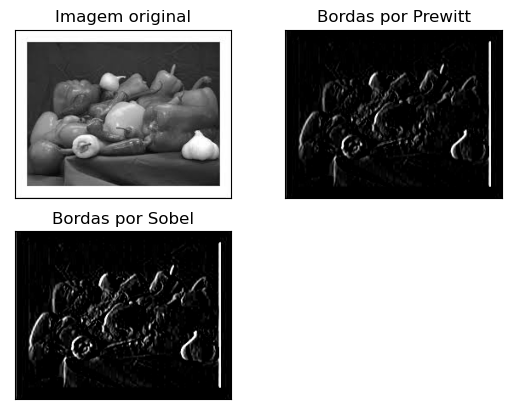

In [34]:
# Detecção de Prewitt e Sobel no Opencv

img_pimenta = cv2.imread('images\\pimenta.jpg', 0)

# Kernel para detecção de bordas verticais de Prewitt (3x3)
prewitt_bord_detection = np.array([
  [-1, 0, 1],
  [-1, 0, 1],
  [-1, 0, 1]
])

# Kernel para detecção de bordas verticais de Sobel (3x3)
sobel_bord_detection = np.array([
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]
])

# Aplicar filtros nas imagens
prewitt_img = cv2.filter2D(img_pimenta, -1, prewitt_bord_detection)
sobel_img = cv2.filter2D(img_pimenta, -1, sobel_bord_detection)

# Plotar todos os resultados
titles = ['Imagem original', 'Bordas por Prewitt', 'Bordas por Sobel']
images = [img_pimenta, prewitt_img, sobel_img]
for i in range(3):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### Detecção de Bordas de Canny

Três objetivos básicos do detector do bordas Canny:

1. baixa taxa de erro (todas as bordas devem ser encontradas)
2. Os pontos da borda devem ser bem localizados (as bordas localizadas devem ser próximas das bordas reais)
3. resposta única para os pontos de uma borda (o operador deve retornar apenas um ponto para cada ponto sobre a borda)

Quanto maior a suavização da imagem, melhor a detecção, porém pior a localização.

- simga maior detecta bordas em escalas maiores
- simga menor detecta bordas em escalas menores

In [35]:
# Detecção de Canny no Opencv

img_coins = cv2.imread('images\coins.jpg')
edges = cv2.Canny(img_coins, 100, 600)

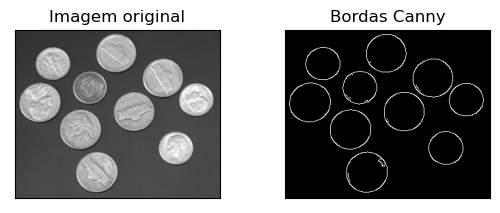

In [36]:
# Plotar todos os resultados
titles = ['Imagem original', 'Bordas Canny']
images = [img_coins, edges]
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 2 - Subtração da imagem filtrada da imagem original para detecção de bordas.

In [37]:
# Detecção de bordas por subtração de imagem filtrada - imagem original

img_garrafa = cv2.imread('images\\garrafa.jpeg', 0)
img_filtered = cv2.GaussianBlur(img_garrafa, (15, 15), 0)

img_subtraction = img_filtered - img_garrafa

subtraction_filtered = cv2.medianBlur(img_subtraction, 9)

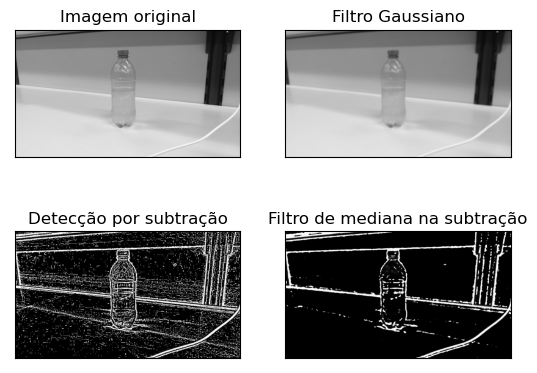

In [38]:
# Plotar todos os resultados
titles = ['Imagem original', 'Filtro Gaussiano', 'Detecção por subtração', 'Filtro de mediana na subtração']
images = [img_garrafa, img_filtered, img_subtraction, subtraction_filtered]
for i in range(4):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 2.a) Qual o resultado obtido? 

O resultado obtido, demonstrado na figura acima, possui representação adequada para análise visual da imagem. Apenas com propósitos estéticos, pois há uma quantidade grande de ruído na imagem. Bordar detectadas como falso positivos. A realização de uma filtragem por mediana ajuda a reduzir esse efeito.

### 2.b) Some o resultado com a imagem original. O que aconteceu? Analise o resultado.

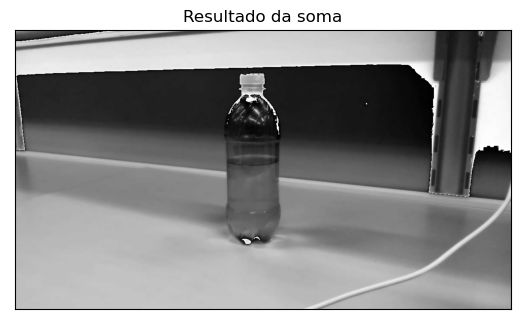

In [39]:
img_sum = img_filtered + img_garrafa

img_sum = cv2.cvtColor(img_sum, cv2.COLOR_BGR2RGB)
plt.subplot(1,1,1)
plt.imshow(img_sum)
plt.title('Resultado da soma')
plt.xticks([]),plt.yticks([])
plt.show()

A imagem apresenta ter removido regiões próximas de bordas, criando um efeito viual de divisão de regiões na imagem. 

### Teste em diferentes imagens

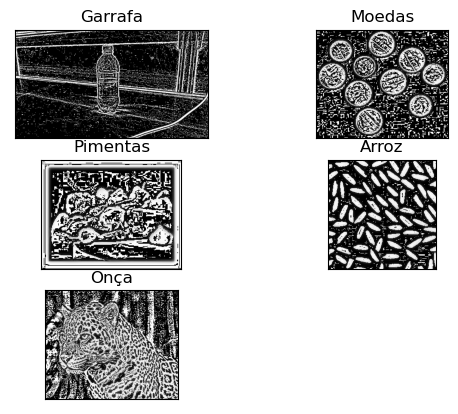

In [40]:
img1 = img_subtraction
img2 = cv2.imread('images\\coins.jpg', 0)
img3 = cv2.imread('images\\pimenta.jpg', 0)
img4 = cv2.imread('images\\rice.jpg', 0)
img5 = cv2.imread('images\\onca.jpg', 0)

img2_filtered = cv2.GaussianBlur(img2, (15, 15), 0)
img3_filtered = cv2.GaussianBlur(img3, (15, 15), 0)
img4_filtered = cv2.GaussianBlur(img4, (15, 15), 0)
img5_filtered = cv2.GaussianBlur(img5, (15, 15), 0)

img2_subtraction = img2_filtered - img2
img3_subtraction = img3_filtered - img3
img4_subtraction = img4_filtered - img4
img5_subtraction = img5_filtered - img5

# Plotar todos os resultados
titles = ['Garrafa', 'Moedas', 'Pimentas', 'Arroz', 'Onça']
images = [img1, img2_subtraction, img3_subtraction, img4_subtraction, img5_subtraction]
for i in range(5):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(3,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Procure na literatura a fundamentação para o experimento e explique os resultados obtidos.

O experiento realizado consistia na realização da subtração da imagem suavisada pelo método Gaussiano pela imagem original. Isso causa um efeito de detecção de bordas. Enquanto a soma da imagem suavisada pela original causa exclusão das bordas. 

A subtração normalmente é utilizada para o processo de *unsharp masking*, que já foi usada por muito tempo pela indústria de publicação para deixar imagens mais nítidas. O processo tem as seguintes etapas:

1. Filtrar a imagem original com Filtro Passa Baixas
2. Subtrair a imagem filtrada pela original (o resultado é chamdo de máscara)
3. Adicionar a máscara na imagem original

Caso a máscara seja adicionada, em sua totalidade, na imagem original, teremos um efeito de Filtro Passa Altas (*highboost filtering*).

Enquanto isso, a soma da imagem com a máscara causa a exclusão dos pontos de mair nitidez da imagem. 

### 3 - Estenda os conceitos de detecção de bordas para imagens coloridas.

A detecção de bordas em imagens coloridas se torna uma tarefa complexa, pois meramente aplicar o gradiente nos canais separados da imagem e juntá-los posteriormente para obter cor não dá certo. Deve-se então achar uma nova definição de gradiente aplicável para quantidades vetoriais. A detecção de bordas de Canny consegue trabalhar com 3 camadas realizando a magnitude de cada gradiente de um determinado pixel com o maior valor de todos os canais.

In [41]:
# Detecção de Canny RGB

img_pimenta = cv2.imread('images\pimenta.jpg')
edges = cv2.Canny(img_pimenta, 100, 400, L2gradient = True)

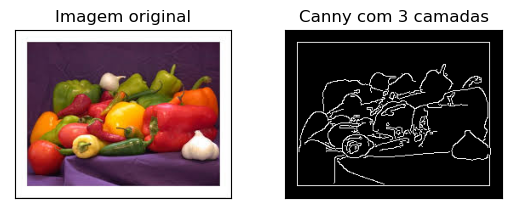

In [42]:
# Plotar todos os resultados
titles = ['Imagem original', 'Canny com 3 camadas']
images = [img_pimenta, edges]
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [43]:
# Detecção de Canny RGB

img_pimenta = cv2.imread('images\pimenta.jpg')
edges1 = cv2.Canny(img_pimenta, 300, 400, L2gradient = True)
edges2 = cv2.Canny(img_pimenta, 10, 40, L2gradient = True)

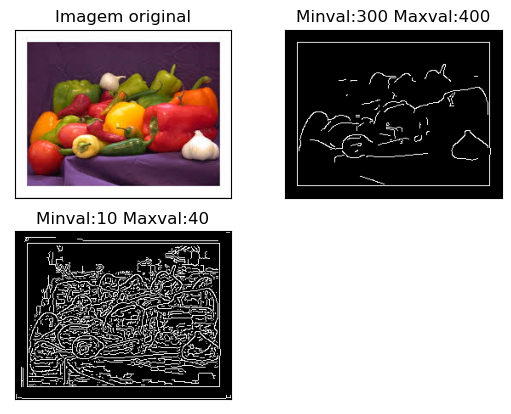

In [44]:
# Plotar todos os resultados
titles = ['Imagem original', 'Minval:300 Maxval:400', 'Minval:10 Maxval:40']
images = [img_pimenta, edges1, edges2]
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()